         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
         Duration       Pulse    Maxpulse     Calories
min     15.000000   80.000000  100.000000    50.300000
max    300.000000  159.000000  184.000000  1860.400000
count  169.000000  169.000000  169.000000   169.000000
mean    63.846154  107.461538  134.047337   375.790244


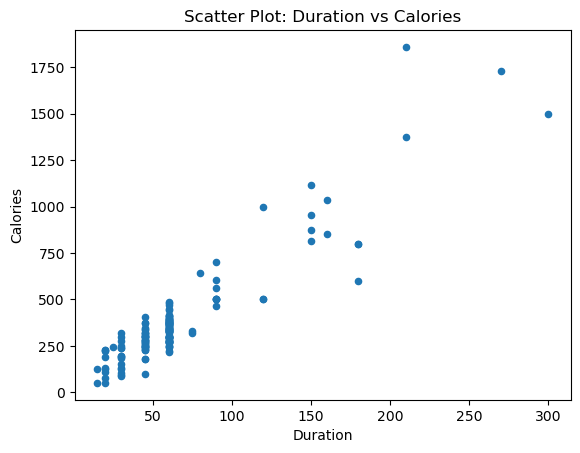

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'data.csv'
df = pd.read_csv(file_path)
print(df.describe())
df.fillna(df.mean(), inplace=True)
columns_to_aggregate = df.columns 
aggregated_data = df[columns_to_aggregate].agg(['min', 'max', 'count', 'mean'])
print(aggregated_data)
filtered_df1 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
filtered_df2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
df_modified = df.drop('Maxpulse', axis=1)
df.drop('Maxpulse', axis=1, inplace=True)
df['Calories'] = df['Calories'].astype(int)
df.plot.scatter(x='Duration', y='Calories', title='Scatter Plot: Duration vs Calories')
plt.show()

Mean Squared Error (Train): 29793161.082422983
Mean Squared Error (Test): 35301898.887134895


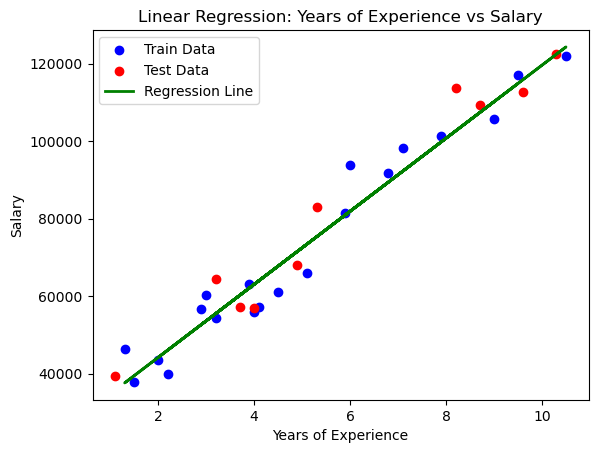

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2, 2.2, 2.9, 3, 3.2, 3.2, 3.7, 3.9, 4, 4, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6, 6.8, 7.1, 7.9, 8.2, 8.7, 9, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]
}
df = pd.DataFrame(data)
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Years of Experience vs Salary')
plt.legend()
plt.show()
